# Regression

<a id=section2></a>
## Use Case : House Prices

Ask a home buyer to describe their __dream house__, and they probably won't begin with the __height__ of the basement ceiling or the __proximity__ to an east-west railroad. But this dataset proves that __much more__ influences price negotiations than the _number of bedrooms or a white-picket fence_.

With __81 explanatory variables__ describing (almost) every aspect of __residential homes in Ames, Iowa__, this competition challenges you to __predict the final price of each home__.<br>The dataset "House Prices" provided by kaggle in: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data.

### Introduction
The idea of this dataset is to provide with a series of features which have as a __target value__ the __cost of a house__.

<a id=section3></a>
## Data Loading and description

### Import the packages

In [2]:
!pip install category_encoders

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import category_encoders as ce
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split


%matplotlib inline

After loading libraries, we need to read and display the data frame.

### Import the data and check for head

In [4]:
prices = pd.read_csv('train.csv')
prices.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


As we can see, there are different kinds of values. For example: <b><i>MSSubClass</i></b> is a <i>int</i> value, <b><i>MSZoning</i></b> is a <i>object</i> value and <b><i>LotFrontage</i></b> is a <i>float</i> value. For different
reasons we must not work with data in this format, we need to handle it in an appropriate format in order to apply
differnt algorithms of machine learning which work with discrete values not continuous. Now let's show information about the data frame.

### Check the column present in dataset

In [5]:
prices.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### Check the shape of the datset

In [6]:
prices.shape

(1460, 81)

### Check the descriptive stats of the dataset

In [7]:
prices.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Check the info of dataset

In [8]:
print(prices.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
prices.select_dtypes(include=['object']).head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


As we can see, there are 43 columns or features which are category type.

<a id=section4></a>
## Data Preprocessing

Now that we know that most of the features are category type, we need to analyze if those
data have null values and solve it. So first we need to extract just the features 
of <i>object</i> type making a copy from the original.

In [10]:
# prices = all features except those with object type value
# prices_objects = all features with object type value
prices_objects = prices.select_dtypes(include=['object']).copy()
prices = prices.select_dtypes(exclude=['object']).copy()
prices_objects.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [11]:
prices.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


Now, let's see how many values are <i>NAN</i> in <b><i>prices</i></b> and <b><i>prices_object</i></b> 

In [12]:
prices = prices.drop(['Id'],axis=1)
prices.isnull().sum()

MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

We can see that featues as <b><i>LotFrontag</i></b> and <b><i>GarageYrBlt</i></b> have some null values, in the next section we will solve this problem. Meanwhile, let's see what is happening with the <b><i>prices_object</i></b> dataset.

In [13]:
prices_objects.isnull().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

We have seen that the features: <b><i>Alley</i>, <b><i>MasVnrType</i></b>, <i>BsmtQual</i>, <i>BsmtCond</i>, <i>BsmtExposure</i>, <i>BsmtFinType1</i>, <i>BsmtFinType2</i>, <i>Electrical, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, PoolQC, Fence, MiscFeature</i></b>; have <i>NaN</i> values.

##  Solving the problem with NaN values

First we will focus on the dataset <i><b>prices_objects</b></i>. To solve the problem, first of all we need to know how many NaN values are for each feature as showed above. 
So as we know, the first feature <i><b>Alley</b></i> has 1369 NaN values of 1460, this represent the 93% of all data,  the same case apply for features like: <i><b>PoolQC, Fence, MiscFeature</b></i> which represent 99%, 80% and 96% of all data. So based on this information we proceed to drop all of this features.

In [14]:
# Dropping not necessary features
prices_objects = prices_objects.drop(['Alley','PoolQC', 'Fence', 'MiscFeature'], axis=1)

Now that we have dropped some features that we do not need, we will to proceed fixing the rest of features which are:
<html>
<head>
</head>
<body>

<table>
  <tr>
    <th>Feature</th>
    <th>Number of Nan</th> 
  </tr>
  <tr>
    <td>BsmtQual</td>
    <td>37</td>
  </tr>
  <tr>
    <td>BsmtCond</td>
    <td>37</td>
  </tr>
  <tr>
    <td>BsmtExposure</td>
    <td>38</td>
  </tr>
  <tr>
    <td>BsmtFinType1</td>
    <td>37</td>
  </tr>
  <tr>
    <td>BsmtFinType2</td>
    <td>38</td>
  </tr>
  <tr>
    <td>Electrical</td>
    <td>1</td>
  </tr>
  <tr>
    <td>FireplaceQu</td>
    <td>690</td>
  </tr>
  <tr>
    <td>GarageType</td>
    <td>81</td>
  </tr>
  <tr>
    <td>GarageFinish</td>
    <td>81</td>
  </tr>
  <tr>
    <td>GarageQual</td>
    <td>81</td>
  </tr>
  <tr>
    <td>GarageCond</td>
    <td>81</td>
  </tr>
  <tr>
    <td>MasVnrType</td>
    <td>8</td>
  </tr>
</table>
</body>
</html>

There are many ways in how to handle NaN values. In this case we just are goint to use the top category in each feature. So we will break down the first two features <i><b> BsmtQual</b></i> and <i><b>BsmtCond</b></i> and then apply the same for the rest of features.
So let's start with the <i><b> BsmtQual</b></i> feature.

### Plotting frequency distribution for variable 'BsmtQual'

In [15]:
prices_objects['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

We have seen that the category <i>TA</i> is the top one. So we are going to supply the Nan values with this feature.

In [16]:
prices_objects['BsmtQual'] = prices_objects['BsmtQual'].fillna(prices_objects['BsmtQual'].value_counts().index[0])

Now let's analyze the <i><b>BsmtCond</b></i> feature:

### Plotting frequency distribution fro variable 'BsmtCond'

In [17]:
prices_objects['BsmtCond'].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

We have seen that the category <i>TA</i> is the top one. So we are going to supply the Nan values with this feature.

In [18]:
prices_objects['BsmtCond'] = prices_objects['BsmtCond'].fillna(prices_objects['BsmtCond'].value_counts().index[0])

So now we will apply the same methodology with the rest of featues.

In [19]:
#Imputer function
x`x`

Reviewing again the data frame, we will see that there is any null value.

In [20]:
prices_objects.isnull().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

Now let's fix the <i>Nan</i> values from <b>prices</b> dataset. We will proceed with the same technique as with the <b>prices_objects</b>.

In [21]:
#Imputer function
im=SimpleImputer(strategy="most_frequent")
df=pd.DataFrame(im.fit_transform(prices))
df.columns=prices.columns
prices=df

In [22]:
prices.isnull().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

Now let's see how is the distribution of each category for some features. In the first case we will analyze the object variable <i>MSZoning</i>.

In [23]:
# To show the count of every category in MSZoning column
print(prices_objects['MSZoning'].value_counts())

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64


Now we will analyze the distribution of categories in the variable <i>Exterior2nd</i>.

In [24]:
# To show the count of every category in Exterior2nd column
print(prices_objects['Exterior2nd'].value_counts())

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64


## 3.2 Fixing the problem with categorical features

We will use One Hot Encoder technique.

In [25]:
encoder = ce.OneHotEncoder(cols=['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 
            'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2','BldgType', 'HouseStyle',
            'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond',
            'Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC',
            'CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish',
            'GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition'])

In [26]:
prices_objects_OneHotEnc = encoder.fit_transform(prices_objects)
prices_objects_OneHotEnc.head()

,MSZoning_1,MSZoning_2,MSZoning_3,MSZoning_4,MSZoning_5,Street_1,Street_2,LotShape_1,LotShape_2,LotShape_3,...,SaleType_6,SaleType_7,SaleType_8,SaleType_9,SaleCondition_1,SaleCondition_2,SaleCondition_3,SaleCondition_4,SaleCondition_5,SaleCondition_6
0,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


## 3.3 Scaling data

In [27]:
Ytrain = prices.SalePrice
prices = prices.drop(['SalePrice'], axis=1)
prices_corpus = pd.concat([prices, prices_objects_OneHotEnc], axis=1)

In [28]:
prices_corpus.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_6,SaleType_7,SaleType_8,SaleType_9,SaleCondition_1,SaleCondition_2,SaleCondition_3,SaleCondition_4,SaleCondition_5,SaleCondition_6
0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,...,0,0,0,0,1,0,0,0,0,0
1,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,...,0,0,0,0,1,0,0,0,0,0
2,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,...,0,0,0,0,1,0,0,0,0,0
3,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,...,0,0,0,0,0,1,0,0,0,0
4,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,...,0,0,0,0,1,0,0,0,0,0


In [29]:
min_max_scaler = preprocessing.MinMaxScaler()

In [30]:
X = pd.DataFrame(min_max_scaler.fit_transform(prices_corpus), columns = prices_corpus.columns)
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_6,SaleType_7,SaleType_8,SaleType_9,SaleCondition_1,SaleCondition_2,SaleCondition_3,SaleCondition_4,SaleCondition_5,SaleCondition_6
0,0.235294,0.150685,0.033420,0.666667,0.500,0.949275,0.883333,0.12250,0.125089,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.202055,0.038795,0.555556,0.875,0.753623,0.433333,0.00000,0.173281,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.235294,0.160959,0.046507,0.666667,0.500,0.934783,0.866667,0.10125,0.086109,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.294118,0.133562,0.038561,0.666667,0.500,0.311594,0.333333,0.00000,0.038271,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.235294,0.215753,0.060576,0.777778,0.500,0.927536,0.833333,0.21875,0.116052,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## Preparing test set

In [31]:
prices_test = pd.read_csv('test.csv')
prices_objects_test = prices_test.select_dtypes(include=['object']).copy()
prices_test = prices_test.select_dtypes(exclude=['object']).copy()
prices_test = prices_test.drop(['Id'],axis=1)
prices_objects_test = prices_objects_test.drop(['Alley','PoolQC', 'Fence', 'MiscFeature'], axis=1)

In [32]:
#Impute prices_objects_test data
im=SimpleImputer(strategy="most_frequent")
df=pd.DataFrame(im.fit_transform(prices_objects_test))
df.columns=prices_objects_test.columns
prices_objects_test=df

In [33]:
#Impute prices_test data
im=SimpleImputer(strategy="most_frequent")
df=pd.DataFrame(im.fit_transform(prices_test))
df.columns=prices_test.columns
prices_test=df

In [34]:
prices_objects_OneHotEnc_test = encoder.fit_transform(prices_objects_test)
prices_corpus_test = pd.concat([prices_test, prices_objects_OneHotEnc_test], axis=1)

Xtest = pd.DataFrame(min_max_scaler.fit_transform(prices_corpus_test), columns = prices_corpus_test.columns)

## Dimensionality Reduction
As we can see that we have more than 250 columns in the data, it's preferrable to reduce the number of variables in a way to retain as much information as possible with as less variables/columns as possible. This can be done using Principal Component Analysis 


In [35]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Text(0, 0.5, 'Variance Ratio')

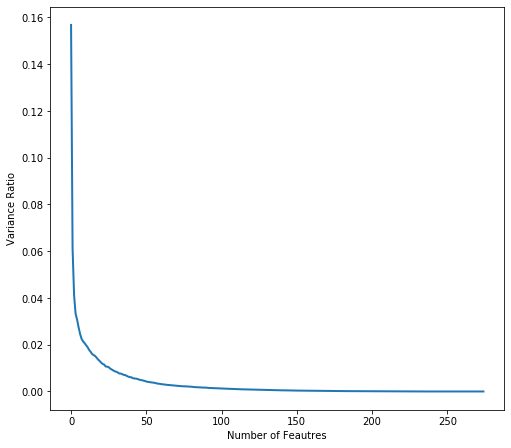

In [36]:
plt.figure(1, figsize=(9, 8))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('Number of Feautres')
plt.ylabel('Variance Ratio')

In [37]:
pca = PCA(n_components=10)

In [38]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [39]:
Xtrain_pca = pca.transform(X)
pca.fit(Xtest)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [40]:
Xtest_pca = pca.transform(Xtest)

In [41]:
Ytrain = Ytrain.astype(float)

##  Linear Regression for Regression

In [42]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()   

In [43]:
linreg.fit(Xtrain_pca, Ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
Ypredict_test = linreg.predict(Xtest_pca)

In [45]:
test = pd.read_csv('test.csv')
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [46]:
Ypred = pd.DataFrame({'SalePrice':Ypredict_test})
prediction = pd.concat([test['Id'], Ypred], axis=1)

In [47]:
prediction = pd.concat([test['Id'], Ypred], axis=1)
prediction.head()

,Id,SalePrice
0,1461,154936.234442
1,1462,136033.156313
2,1463,165561.550545
3,1464,191914.291121
4,1465,264019.709461


### Model Evaluation using MSE

In [48]:
Ypredict_train = linreg.predict(Xtrain_pca)

In [49]:
MSE_train = metrics.mean_squared_error(Ytrain, Ypredict_train)

In [50]:
print('MSE for training set is {}'.format(MSE_train))

MSE for training set is 2155896610.5748982


### Model Evaluation using RMSE

In [51]:
RMSE_train = np.sqrt( metrics.mean_squared_error(Ytrain, Ypredict_train))

In [52]:
print('RMSE for training set is {}'.format(RMSE_train))

RMSE for training set is 46431.63372717891


## Other Model Metrics using OLS

In [53]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

p=sm.OLS(Ytrain,Xtrain_pca)
result=p.fit()

print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.106
Model:                            OLS   Adj. R-squared (uncentered):              0.100
Method:                 Least Squares   F-statistic:                              17.25
Date:                Fri, 25 Sep 2020   Prob (F-statistic):                    6.29e-30
Time:                        14:23:12   Log-Likelihood:                         -19793.
No. Observations:                1460   AIC:                                  3.961e+04
Df Residuals:                    1450   BIC:                                  3.966e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

##  KNN for Regression

In [54]:
from sklearn.neighbors import KNeighborsRegressor
knn_regressor = KNeighborsRegressor(n_neighbors=3)

In [55]:
knn_regressor.fit(Xtrain_pca, Ytrain)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [56]:
Ypredict_test = knn_regressor.predict(Xtest_pca)

In [57]:
test = pd.read_csv('test.csv')
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [58]:
Ypred = pd.DataFrame({'SalePrice':Ypredict_test})
prediction = pd.concat([test['Id'], Ypred], axis=1)

In [59]:
prediction = pd.concat([test['Id'], Ypred], axis=1)
prediction.head()

,Id,SalePrice
0,1461,110866.666667
1,1462,148000.000000
2,1463,220100.000000
3,1464,221466.666667
4,1465,314633.333333


### Model Evaluation using MSE

In [60]:
Ypredict_train = knn_regressor.predict(Xtrain_pca)

In [61]:
MSE_train = metrics.mean_squared_error(Ytrain, Ypredict_train)

In [62]:
print('MSE for training set is {}'.format(MSE_train))

MSE for training set is 902047955.8310504


### Model Evaluation using RMSE

In [63]:
RMSE_train = np.sqrt( metrics.mean_squared_error(Ytrain, Ypredict_train))

In [64]:
print('RMSE for training set is {}'.format(RMSE_train))

RMSE for training set is 30034.11320200832


## Support Vector Machine for Regression

In [65]:

from sklearn.svm import SVR
clf = SVR(C=0.8, epsilon=0.2, kernel='poly')

In [66]:
clf.fit(Xtrain_pca, Ytrain)

SVR(C=0.8, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [67]:
Ypredict_test = clf.predict(Xtest_pca)

In [68]:
test = pd.read_csv('test.csv')
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [69]:
Ypred = pd.DataFrame({'SalePrice':Ypredict_test})
prediction = pd.concat([test['Id'], Ypred], axis=1)

In [70]:
prediction = pd.concat([test['Id'], Ypred], axis=1)
prediction.head()

,Id,SalePrice
0,1461,163026.916364
1,1462,163052.976214
2,1463,163139.809216
3,1464,163148.902887
4,1465,163161.475959


### Model Evaluation using MSE

In [71]:
from sklearn import metrics

In [72]:
Ypredict_train = clf.predict(Xtrain_pca)

In [73]:
MSE_train = metrics.mean_squared_error(Ytrain, Ypredict_train)

In [74]:
print('MSE for training set is {}'.format(MSE_train))

MSE for training set is 6608410250.303374


### Model Evaluation using RMSE

In [75]:
RMSE_train = np.sqrt( metrics.mean_squared_error(Ytrain, Ypredict_train))

In [76]:
print('RMSE for training set is {}'.format(RMSE_train))

RMSE for training set is 81292.12907965551


### Conclusion

- Comparing the RMSE values, we see that KNN regression has performed the best
- There is no absolute criterion for a "good" value of RMSE or MAE: it depends on the units in which the variable is measured and on the degree of forecasting accuracy, as measured in those units, which is sought in a particular application. Depending on the choice of units, the RMSE or MAE of your best model could be measured in zillions or one-zillionths. It makes no sense to say "the model is good (bad) because the root mean squared error is less (greater) than x", unless you are referring to a specific degree of accuracy that is relevant to your forecasting application.
